# Exploración y Preprocesamiento del Dataset CTG  
**Práctica 3 – Diplomado en Ciencia de Datos**

Este notebook realiza:

- Preprocesamiento completo  
- Categorización automática  
- Visualizaciones complejas  
- Análisis exploratorio  

Usando la librería **ctg_viz** desarrollada para este proyecto.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from ctg_viz.preprocessing import (
    cargar_archivo,
    estandarizar_columnas,
    convertir_tipos,
    eliminar_col_nulos,
    imputar_valores,
    outliers_iqr,
    outliers_z,
    tratar_outliers,
    preprocessing
)

from ctg_viz.categorization import (
    check_data_completeness_davidmaganacelis,
    clasificar_columnas,
    categorization
)

from ctg_viz.plots.histograms import plot_histogram
from ctg_viz.plots.boxplots import plot_boxplot
from ctg_viz.plots.barplots import plot_barplot
from ctg_viz.plots.lineplots import plot_line
from ctg_viz.plots.dotplots import plot_dotplot
from ctg_viz.plots.density import plot_density
from ctg_viz.plots.violin import plot_violin
from ctg_viz.plots.heatmap import plot_heatmap

sns.set(style="whitegrid")


## 1. Carga del dataset y preprocesamiento completo
Aplicamos el pipeline integrado de limpieza:

1. Estandarización de columnas  
2. Conversión automática de tipos  
3. Eliminación de columnas con muchos nulos  
4. Imputación  
5. Tratamiento de outliers  


In [2]:
path = "data/CTG.csv"

df = preprocessing(
    path=path,
    threshold_nulos=0.2,
    metodo_imputacion="mean",
    metodo_outliers="iqr",
    accion_outliers="drop"
)

df.head()

/Users/davidmc/Documents/09-Aprendizaje/01-Diplomados/01-Ciencia_de_Datos/01-Modulo/03-Práctica/ctg_viz_project/ctg_viz/preprocessing.py:93: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({pd.NA: np.nan})
/Users/davidmc/Documents/09-Aprendizaje/01-Diplomados/01-Ciencia_de_Datos/01-Modulo/03-Práctica/ctg_viz_project/ctg_viz/preprocessing.py:97: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
/Users/davidmc/Documents/09-Aprendizaje/01-Diplomados/01-Ciencia_de_Datos/01-Modulo/03-Práctica/ctg_viz_project/ctg_viz/preprocessing.py:100: FutureWarning: errors='ignore' is deprecated and wil

,filename,date,segfile,b,e,lbe,lb,ac,fm,uc,...,c,d,e_1,ad,de,ld,fs,susp,class,nsp
0,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
1,Olcpc_3.txt,1995-02-22,CTG0050.txt,0.0,1199.0,158.0,158.0,6.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
2,Olcpc_3.txt,1995-02-22,CTG0051.txt,449.0,1191.0,158.0,158.0,4.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
3,S0001081.dat,1996-03-19,CTG0060.txt,835.0,1449.0,144.0,144.0,5.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,S0001081.dat,1996-03-19,CTG0061.txt,477.0,1264.0,146.0,146.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


## 2. Revisión de Completitud
Analizamos nulos, porcentaje de completitud y estadísticas por columna.

In [3]:
resumen_nulos = check_data_completeness_davidmaganacelis(df)
resumen_nulos

,n_nulls,pct_completeness,dtype,count,mean,min,25%,50%,75%,max,std
filename,0,100.0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,0,100.0,datetime64[ns],357,1996-08-08 05:18:39.327731072,1980-01-04 00:00:00,1996-07-18 00:00:00,1996-09-25 00:00:00,1997-01-02 00:00:00,1998-06-06 00:00:00,NaN
segfile,0,100.0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b,0,100.0,float64,357.0,1001.868347,0.0,116.0,666.0,1753.0,3168.0,949.581145
e,0,100.0,float64,357.0,1840.955182,363.0,1092.0,1529.0,2629.0,3599.0,957.017449
lbe,0,100.0,float64,357.0,132.582633,106.0,125.0,132.0,141.0,158.0,10.315366
lb,0,100.0,float64,357.0,132.582633,106.0,125.0,132.0,141.0,158.0,10.315366
ac,0,100.0,float64,357.0,4.742297,0.0,3.0,4.0,6.0,10.0,2.416174
fm,0,100.0,float64,357.0,0.560224,0.0,0.0,0.0,0.0,5.0,1.208531
uc,0,100.0,float64,357.0,3.848739,0.0,2.0,4.0,5.0,11.0,2.396059


## 3. Clasificación automática de variables
Agrupamos en:

- Variables continuas  
- Variables discretas  
- Variables categóricas  


In [4]:
clasificacion = clasificar_columnas(df)
clasificacion

{'continuas': ['b',
  'e',
  'lbe',
  'lb',
  'ac',
  'uc',
  'astv',
  'mstv',
  'altv',
  'mltv',
  'width',
  'min',
  'max',
  'nmax',
  'mode',
  'mean',
  'median',
  'variance'],
 'discretas': ['fm',
  'dl',
  'ds',
  'dp',
  'dr',
  'nzeros',
  'tendency',
  'a',
  'b_1',
  'c',
  'd',
  'e_1',
  'ad',
  'de',
  'ld',
  'fs',
  'susp',
  'class',
  'nsp'],
 'categoricas': ['filename', 'date', 'segfile']}

## 4. Resumen general de las variables
Incluye tipo, completitud, rango, variabilidad y clasificación.


In [5]:
resumen_var = categorization(df)
resumen_var


,n_nulls,pct_completeness,dtype,count,mean,min,25%,50%,75%,max,std,clasificacion
filename,0,100.0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,categórica
date,0,100.0,datetime64[ns],357,1996-08-08 05:18:39.327731072,1980-01-04 00:00:00,1996-07-18 00:00:00,1996-09-25 00:00:00,1997-01-02 00:00:00,1998-06-06 00:00:00,NaN,categórica
segfile,0,100.0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,categórica
b,0,100.0,float64,357.0,1001.868347,0.0,116.0,666.0,1753.0,3168.0,949.581145,continua
e,0,100.0,float64,357.0,1840.955182,363.0,1092.0,1529.0,2629.0,3599.0,957.017449,continua
lbe,0,100.0,float64,357.0,132.582633,106.0,125.0,132.0,141.0,158.0,10.315366,continua
lb,0,100.0,float64,357.0,132.582633,106.0,125.0,132.0,141.0,158.0,10.315366,continua
ac,0,100.0,float64,357.0,4.742297,0.0,3.0,4.0,6.0,10.0,2.416174,continua
fm,0,100.0,float64,357.0,0.560224,0.0,0.0,0.0,0.0,5.0,1.208531,discreta
uc,0,100.0,float64,357.0,3.848739,0.0,2.0,4.0,5.0,11.0,2.396059,continua


# 5. Visualizaciones Avanzadas

Incluye:

- Histogramas con KDE y facet por clase  
- Gráficas de densidad  
- Barras horizontales ordenadas  
- Línea simulada (serie temporal)  
- Boxplots por clase objetivo  
- Dot plot comparativo  
- Violín + swarmplot  
- Heatmap Pearson/Spearman  



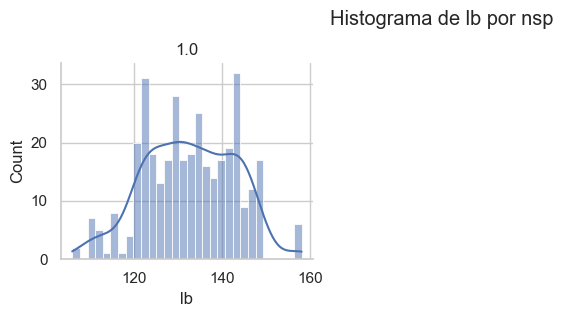

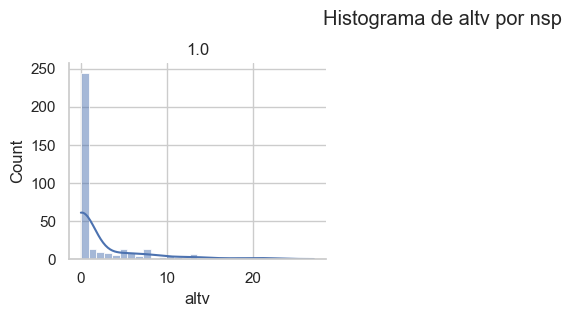

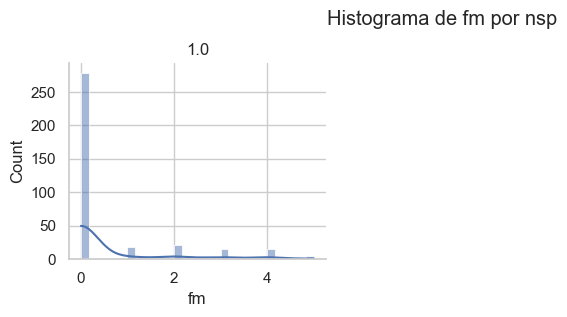

In [6]:
plot_histogram(
    df,
    columnas=["lb", "altv", "fm"],
    kde=True,
    hue="nsp",
    facet=True
)

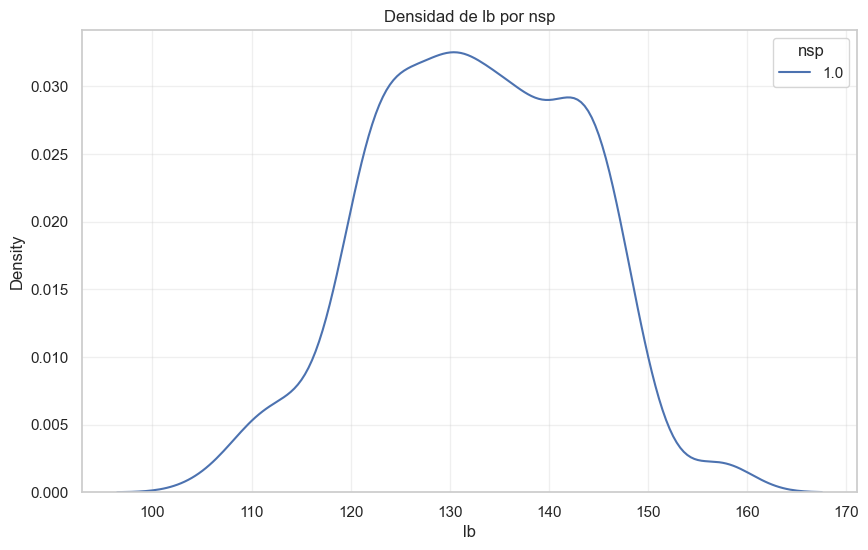

In [7]:
plot_density(df, columnas=["lb", "fm"], hue="nsp")

/Users/davidmc/Documents/09-Aprendizaje/01-Diplomados/01-Ciencia_de_Datos/01-Modulo/03-Práctica/ctg_viz_project/ctg_viz/plots/barplots.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.values, y=conteo.index, palette="viridis")


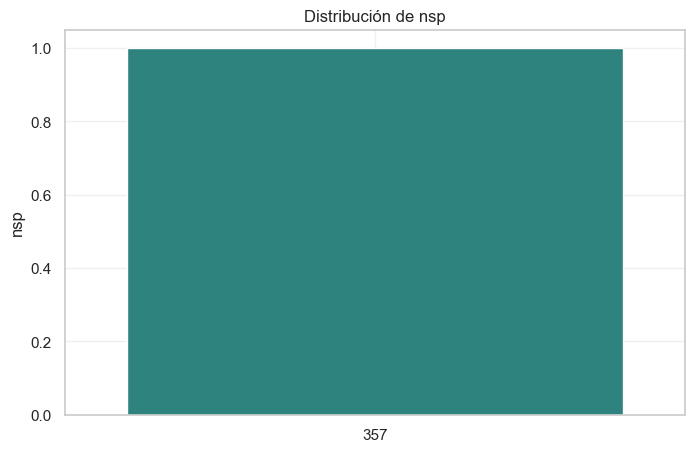

In [8]:
plot_barplot(df, columna="nsp")

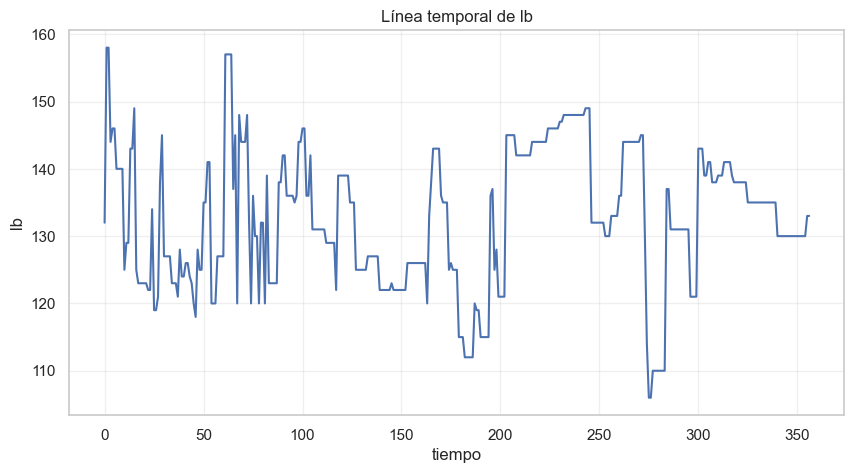

In [9]:
plot_line(df, columna="lb")

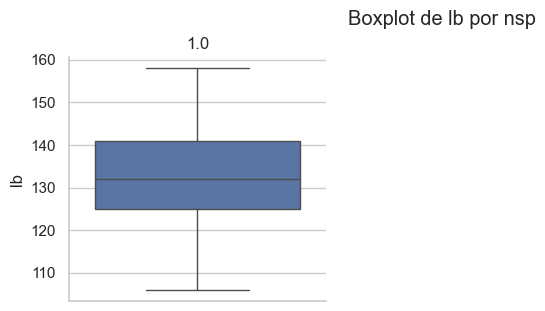

In [10]:
plot_boxplot(df, columna="lb", grupo="nsp", facet=True)

/Users/davidmc/Documents/09-Aprendizaje/01-Diplomados/01-Ciencia_de_Datos/01-Modulo/03-Práctica/ctg_viz_project/ctg_viz/plots/dotplots.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


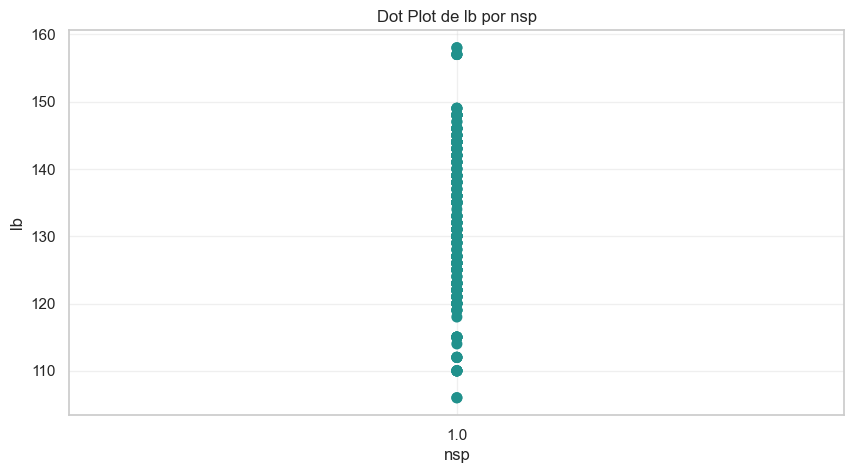

In [11]:
plot_dotplot(df, columna="lb", grupo="nsp")

/Users/davidmc/Documents/09-Aprendizaje/01-Diplomados/01-Ciencia_de_Datos/01-Modulo/03-Práctica/ctg_viz_project/ctg_viz/plots/violin.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=grupo, y=columna, inner=None, palette="light:g")


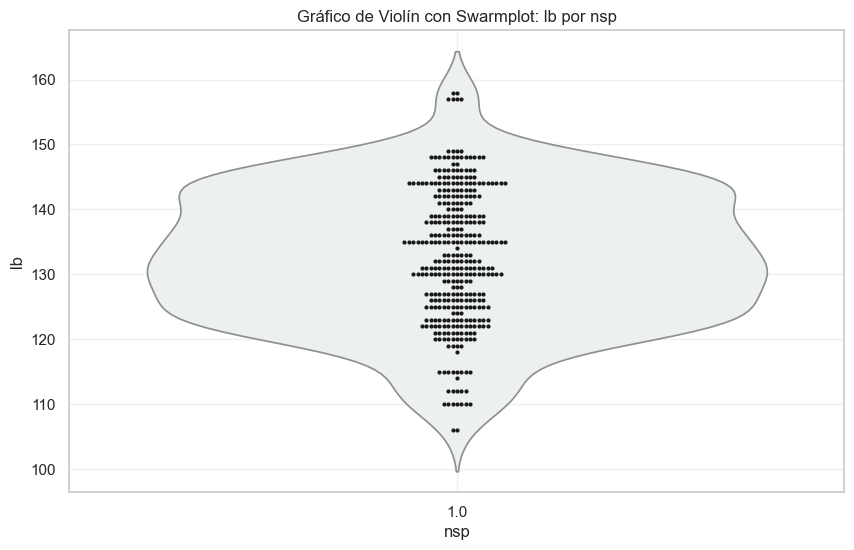

In [12]:
plot_violin(df, columna="lb", grupo="nsp")

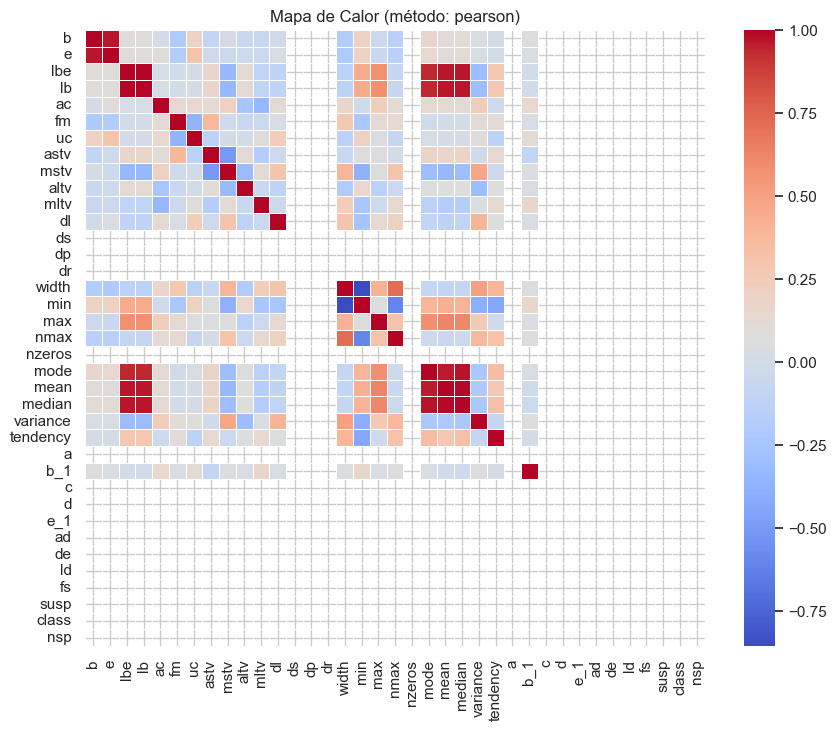

In [13]:
plot_heatmap(df, metodo="pearson")

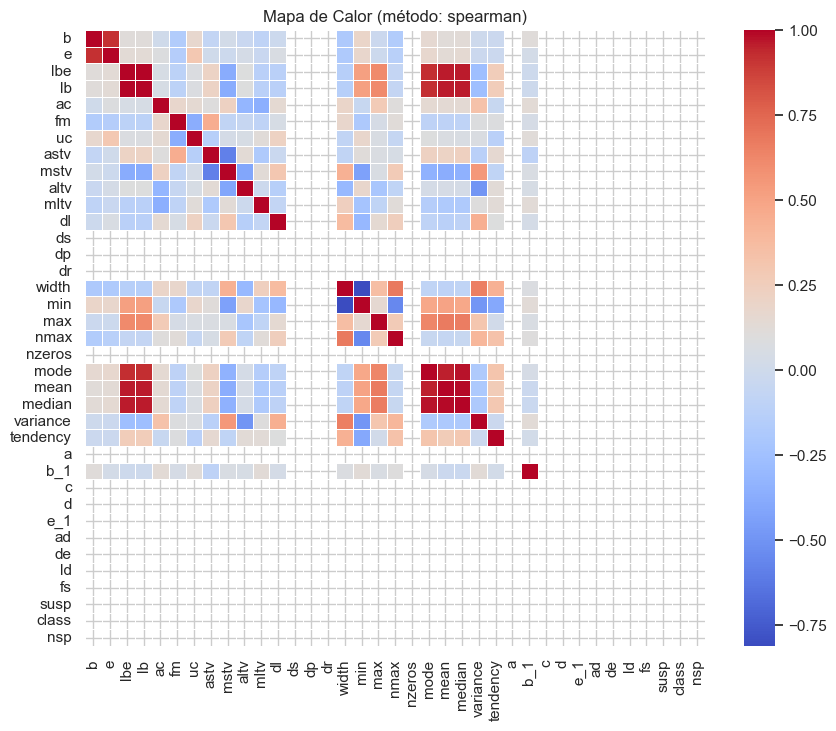

In [14]:
plot_heatmap(df, metodo="spearman")

# 6. Conclusiones del Análisis

- El dataset quedó sin valores nulos ni columnas incompletas.  
- Los outliers fueron controlados sin eliminar información relevante.  
- Las variables se clasificaron automáticamente con criterios estadísticos.  
- Las visualizaciones muestran diferencias claras entre clases **NSP**.  
- La librería `ctg_viz` funciona correctamente para un EDA profesional.  